# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

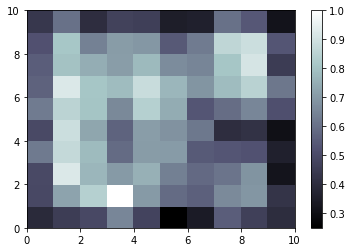

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

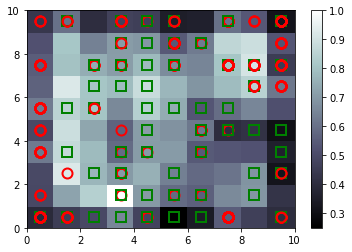

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,3)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15591360.0
15649183.0
15598266.0
15593694.0
15707602.0
15712483.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialized randomly.
The map will be trained with the online algorithm.
Training SOM... done!


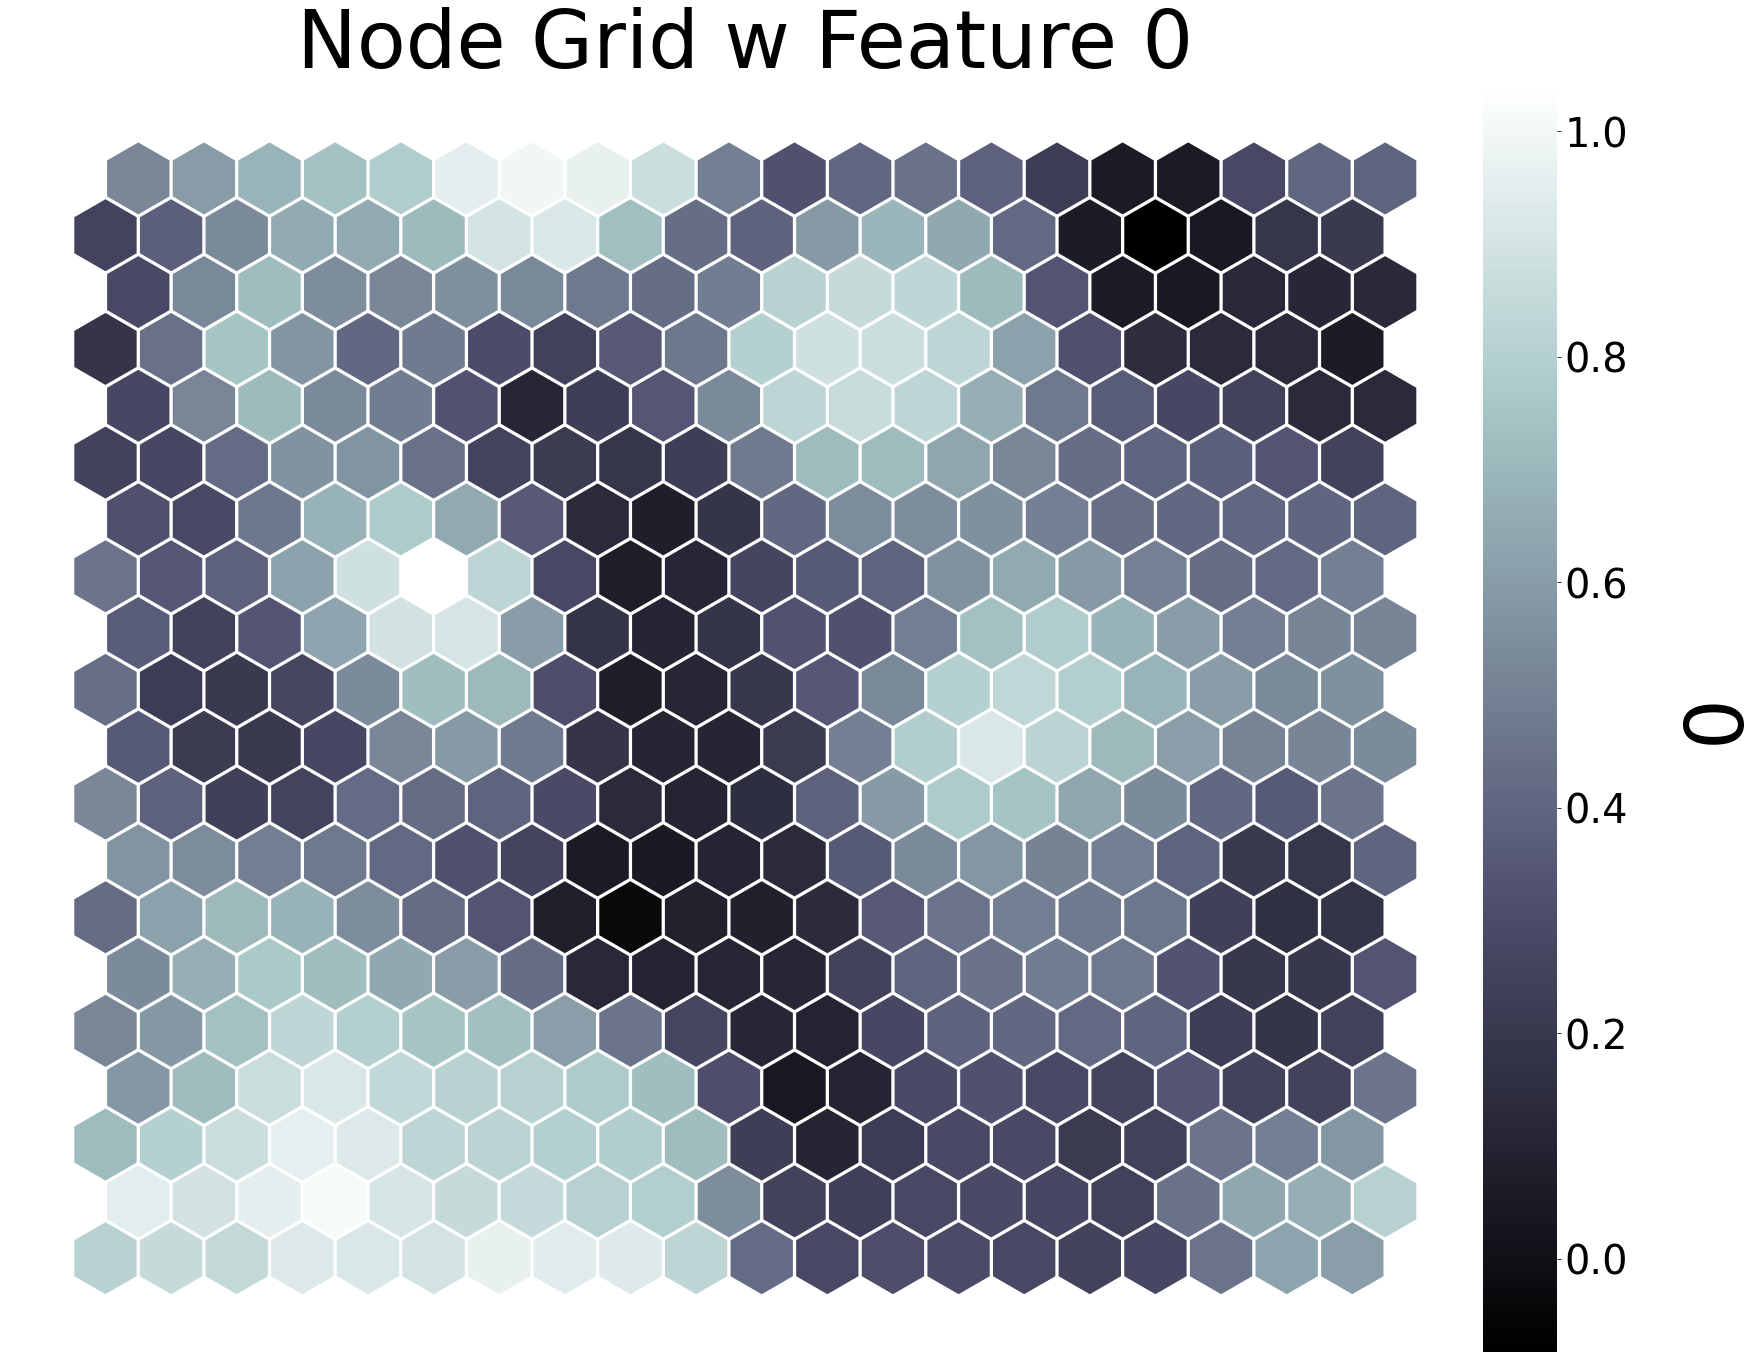

In [23]:
# ! pip install SimpSOM
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.SOMNet(20, 20, X, PBC=True, init='random')
net.train(train_algo='online', start_learning_rate=0.5, epochs=500)
net.save('simpsom_weights')
net.nodes_graph(colnum=0)


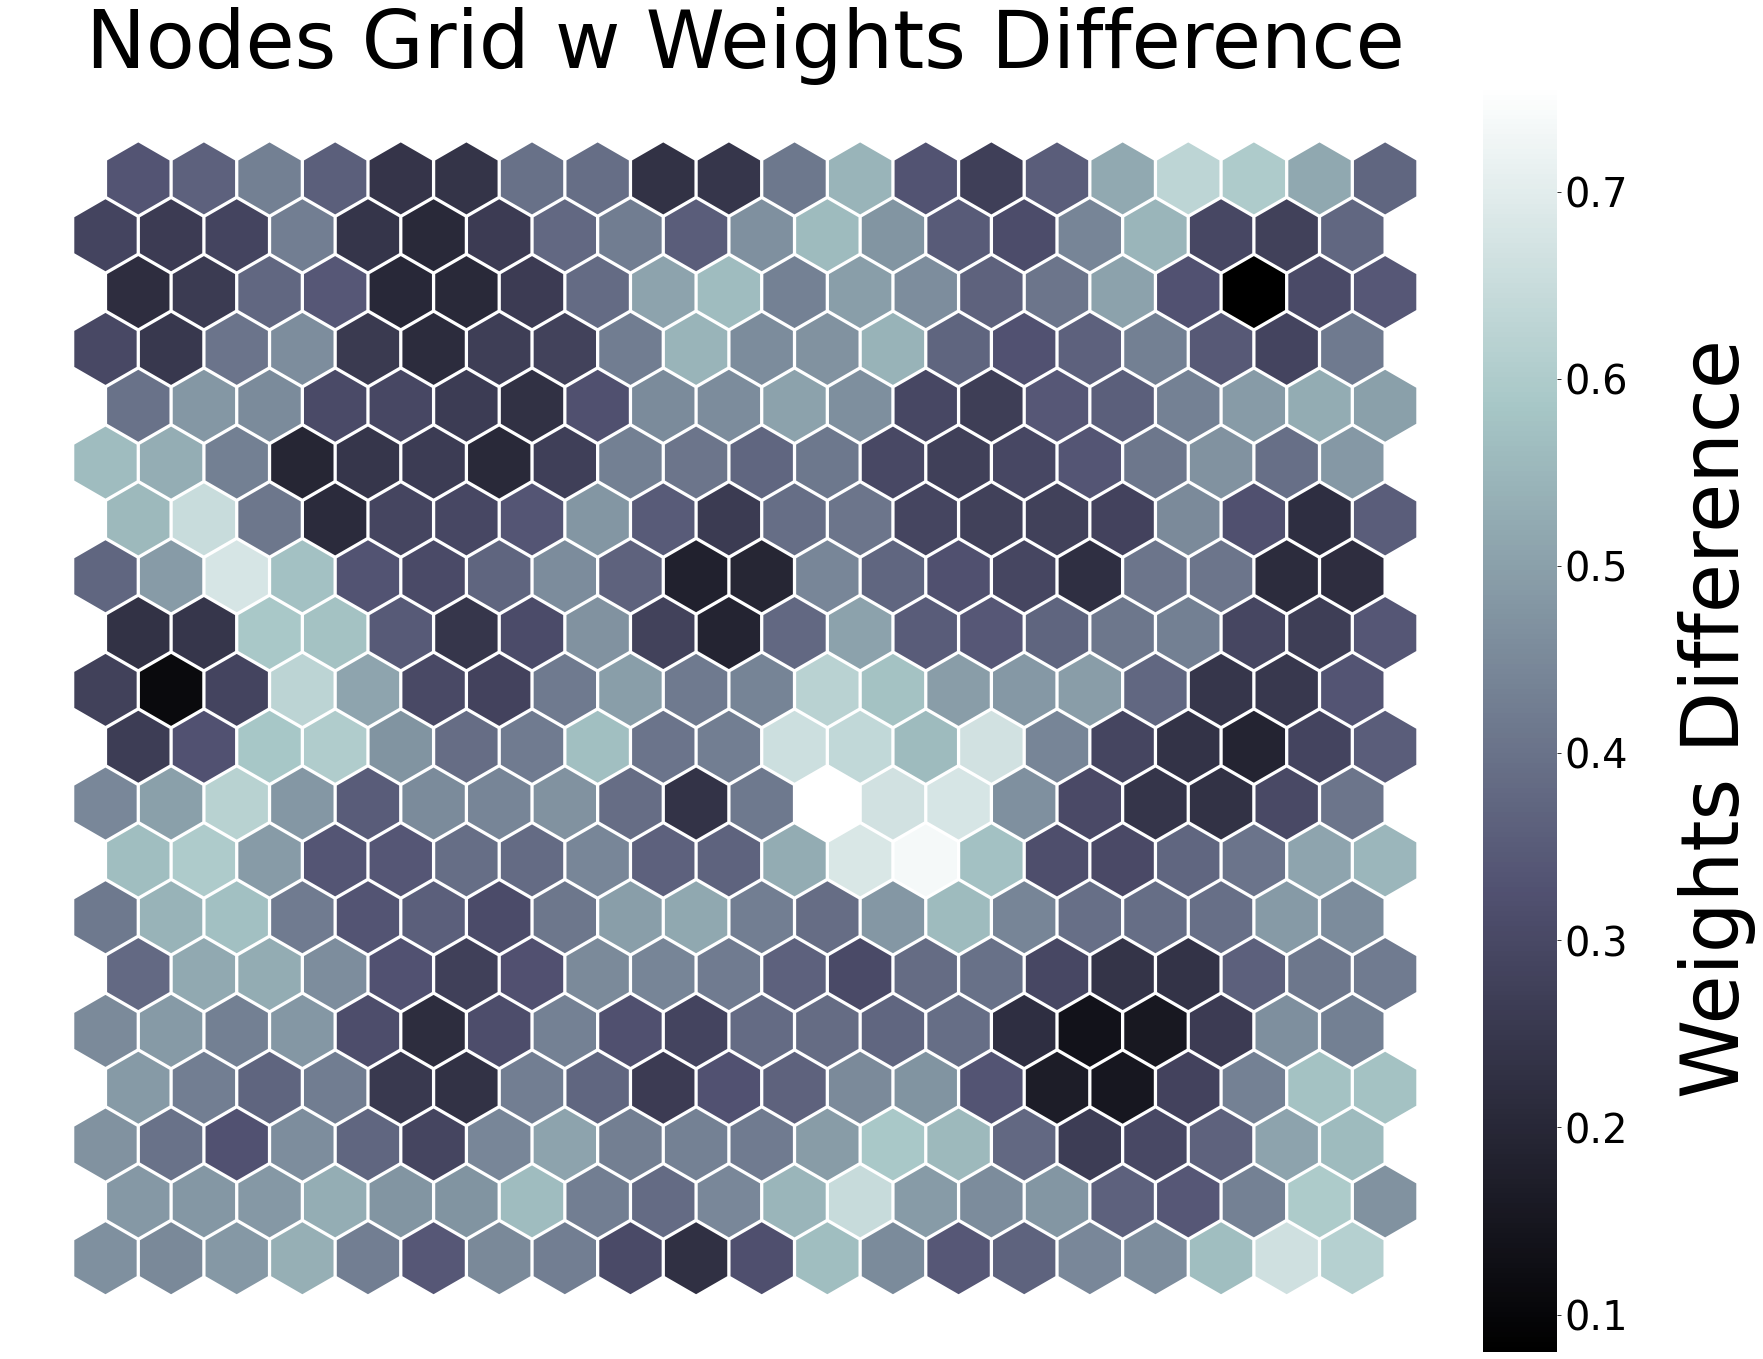

In [22]:
net.diff_graph()

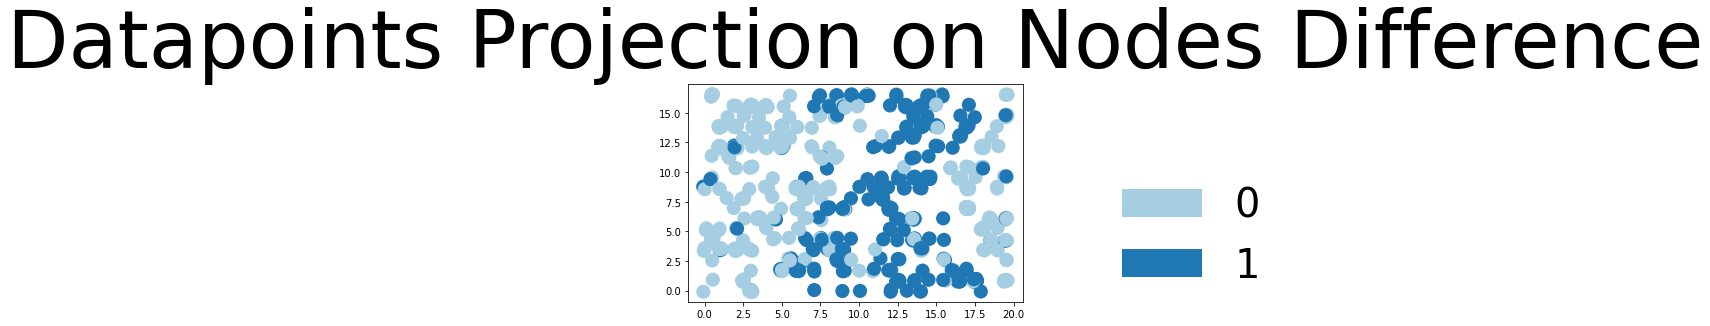

<Figure size 432x288 with 0 Axes>

In [34]:
#Project the datapoints on the new 2D network map.
graph=net.project(X, labels=y,show=True)

In [51]:
graph=np.array(graph)

[]

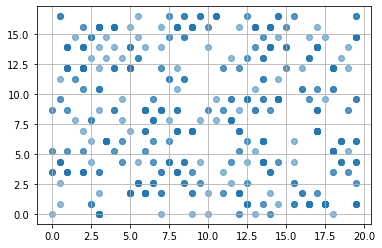

In [53]:
plt.scatter(graph.T[0], graph.T[1], alpha=0.5)
plt.grid(True)
plt.plot()

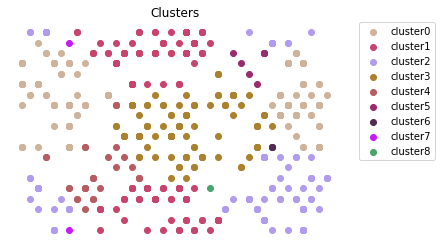

<Figure size 432x288 with 0 Axes>

In [19]:
#Cluster the datapoints according to the Quality Threshold algorithm.
sps_clusters = net.cluster(X, clus_type='qthresh', show=True)